# 고급회귀분석 CH10

SEOYEON CHOI  
2022-12-11

> 이상치

In [43]:
library(ggplot2)

# 회귀진단

1.  오차항의 검토
2.  적절한 모형의 선택
3.  독립변수들 간의 상관관계 검토
4.  지렛대점(leverage point)의 검출
5.  이상치(outlier) 화인
6.  영향점(influential observation)의 검출

추정된 회귀직선

$$\hat{y} = X(X^\top X)^{-1} X^\top y = Hy$$

H: hat matrix, $n \times n$ matrix

$Var(\hat{y}) = \sigma^2 H$

$Var(e) = (I_N - H) \sigma^2$

$h_{i,j} = x_i^\top (X^\top X) ^{-1} x_j$

$h_{ij}$ : H의 대각원소

$H = X(X^\top X)^{-1} X^\top$

$HH = H$

$rank(H) = p+1$

$tr(H) = \sum^n_{i=1}h_{ii} = p+1$

$H$ : 양반정치행렬 positive definite

$0 \le h_{ii} <1 , -\frac{1}{2} \le h_{ij} \le -\frac{1}{2}$

$p=1, h_{ii} = \frac{1}{n} + \frac{(x_{u} - \bar{x})^2}{S_{xx}}$

$p>1, h_{ii} = \frac{1}{n} + (x_i - \bar{x})^\top (X^\top X)^{-1} (x_i - \bar{x})$

### 지렛대점(leverage point)

$h_{ii} > s\bar{h}$ 이면, i번째 관측치가 leverage point로 고려 가능

$$\bar{h} = \frac{1}{n} \sum^n_{i=1}h_{ii} = \frac{p+1}{n}$$

### 잔차(Residual)

$e = y − \hat{y} = y − X \hat{\beta}$

$= y − X(X^\top X)^{-1} X^\top y$

$= (In − X(X^\to X)^{-1}X^\to )y = (I_n − H)y$

$E(e) = 0_n, Var(e) = (I_n − H)σ^2$

$E(e_i) = 0, Var(e_i) = (1 − h_{ii})σ^2$

$Cov(e_i,e_j) = −h_{ij} σ^2$

$ρ_{ij} = \frac{−h_{ij} σ^2}{ \sqrt{(1 − h_{ii})(1 − h_{jj})σ^4} }=\frac{ −h_{ij}}{\sqrt{(1 − h_{ii})(1 − h_{jj})}}$

### 표준화잔차(standardized residual)

$y \sim N(Xβ,I_nσ^2)$

$e \sim N(0_n,(I_n−H)σ^2)$

$e_i \sim N(0,(1−h_{ii})σ^2)$

$\star \frac{e_i}{\sigma\sqrt{1-h_{ii}}} \sim N(0,1)$

#### 내적 스튜던트화 잔차(internally studentized residual)

$r_i = \frac{e_i}{\hat{\sigma}\sqrt{1−h_{ii}}}$

$\hat{\sigma}^2 = MSE$

이러한 표준화 잔차에 대한 표본분포는 분자와 분모가 서로 독립이 아니기
때문에 $t$ 분포로 근사할 수 없는데, $|e_i|$가 큰 경우, $s$도 역시 커지게
되기 때문이다.

#### 외적 스튜던트화 잔차(externally studentized residual)

$r_i^{*} = \frac{e_i}{\hat{\sigma}_{(i)}\sqrt{1 − h_{ii}}} \sim t(n-p-1-1)$

$\hat{\sigma}^2_{(i)} = [(n-p-1)\hat{\sigma} - \frac{e^2_{(i)}}{1-h_{ii}}]/(n-p-2)$

$|r_i^{*}| ≥ t_{α/2}(n − p − 2)$ 이면 유의수준$\alpha$에서 $y_i$를
이상점이라고 판정

$\star$

$t_{i} = \frac{y_i - \tilde{y}_i}{\hat{\sigma}\sqrt{1 + x_i^\top [X{i}^\top X(i)]^{-1} x_i}} \sim t(n-p-2)$

$|r_i^{*}| \sim t_{i}$

### 예제 10.1

In [3]:
df = data.frame('x' =  c(15, 26, 10, 9, 15, 20, 18, 11, 8, 20, 7, 9, 10, 11, 11, 10, 12, 42, 17, 11, 10),
    'y' = c(95, 71, 83, 91, 102, 87, 93, 100, 104, 94, 113, 96, 83, 84, 102, 100, 105, 57, 121, 86, 100))

In [45]:
model = lm(y~x,df)

In [48]:
summary(model)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.604  -8.731   1.396   4.523  30.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.8738     5.0678  21.681 7.31e-15 ***
x            -1.1270     0.3102  -3.633  0.00177 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.02 on 19 degrees of freedom
Multiple R-squared:   0.41, Adjusted R-squared:  0.3789 
F-statistic:  13.2 on 1 and 19 DF,  p-value: 0.001769

$y = 109.8738 -1.1270 x$

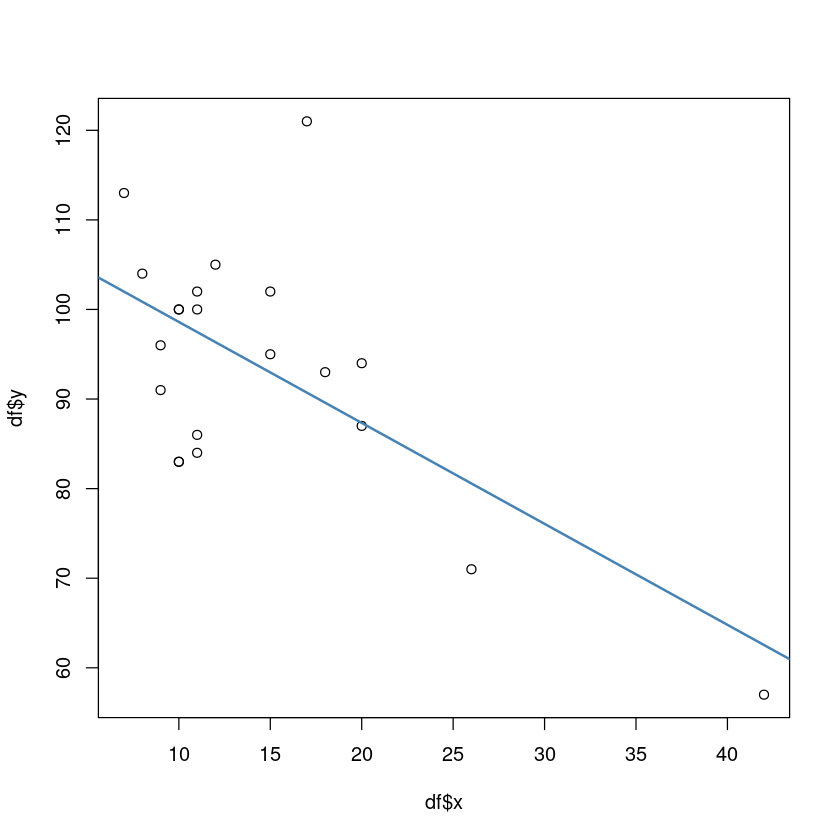

In [49]:
plot(df$x,df$y)
abline(model, col='steelblue', lwd=2)

In [51]:
anova(model)

In [52]:
qf(0.95,1,19)

4.3807496923318

$F_0 = 13.20 > F_{0.05}(1,19) = 4.38$, 회귀직선은 유의하다

$\sigma^2 \sim MSE$

In [83]:
MSE = 121.505

In [84]:
sqrt(MSE)

11.0229306447968

손계산

In [91]:
res = df$y - (109.874 - 1.127*df$x)

In [94]:
h = 1/21 + (df$x - mean(df$x))^2/(1604.08)

In [97]:
ri = res/(sqrt(MSE)*sqrt(1-h))

In [98]:
ri2 = res/(((19*sqrt(MSE) - res^2/(1-h))/18)*sqrt(1-h))

In [102]:
rstudent(model)

1 0.183968493379394 2 -0.941583351378201 3 -1.51081192291799 4 -0.814263363159438 5 0.832862917520795 6 -0.030631827537088 7 0.311246764732158 8 0.229715749649931 9 0.289910136925676 10 0.617660260595883 11 1.05084716358865 12 -0.342831483529281 13 -1.51081192291799 14 -1.27977575448039 15 0.413153195694502 16 0.127393415386012 17 0.798281144415116 18 -0.845110861537551 19 3.60697972130439 20 -1.07648107628971 21 0.127393415386012

In [103]:
rstudent(model)[abs(rstudent(model))>qt(0.975,258)]

19: 3.60697972130439

In [101]:
round(data.frame(rep(1:21),res,h,ri,ri2),4)

$2\bar{h}$

In [85]:
2*(2/21)

0.19047619047619

18번째가 2hbar 보다 크니까 지렛대점

In [86]:
qt(0.975,18)

2.10092204024104

19번째가 ri2 t보다 크니까 이상점

In [105]:
summary(influence.measures( model))

Potentially influential observations of
     lm(formula = y ~ x, data = df) :

   dfb.1_ dfb.x   dffit   cov.r   cook.d hat    
18  0.83  -1.11_* -1.16_*  2.96_*  0.68   0.65_*
19  0.14   0.27    0.85    0.40_*  0.22   0.05  

### 영향점(influential observation)

#### DIFFITS

$DIFFITS(i) = (\frac{h_{ii}}{10h_{ii}})^{1/2} r^{*}_i$

$DIFFITS(i) \ge 2(\frac{p+1}{n})^{1/2}$ 이 되는 i번째 관측칠가
영향점이라고 말함

#### Cook의 통계량

$D(i) = \frac{r^2_i}{p+1} \frac{h_{ii}}{1-h_{ii}}$

대략적으로 $D(i) \ge F_{0.5}(p+1,n-p-1)$이면 영향을 크게 주는 측정값으로
의심

h

In [107]:
hatvalues(model)

1 0.0479224794510218 2 0.154513234296056 3 0.0628157755825353 4 0.0705452077520549 5 0.0479224794510218 6 0.0726189578463163 7 0.0579895935449815 8 0.0566699343940879 9 0.0798582309026469 10 0.0726189578463163 11 0.0907548450343111 12 0.0705452077520549 13 0.0628157755825353 14 0.0566699343940879 15 0.0566699343940879 16 0.0628157755825353 17 0.0521076841867129 18 0.65160998416409 19 0.0530502978659226 20 0.0566699343940879 21 0.0628157755825353

diffits

In [108]:
dffits(model)

1 0.0412740357514056 2 -0.402520687302525 3 -0.391140045474215 4 -0.224328533660804 5 0.186855983882421 6 -0.00857173640678122 7 0.0772239528389379 8 0.0563034865220476 9 0.085407472693718 10 0.172840518129759 11 0.331996853994253 12 -0.0944496430423618 13 -0.391140045474215 14 -0.313673908094842 15 0.101264129345836 16 0.0329813827461469 17 0.187166128054405 18 -1.15577873097521 19 0.853737107130766 20 -0.263846244162542 21 0.0329813827461469

cooksdistance, D

In [109]:
cooks.distance(model)

1 0.000897406392870691 2 0.0814979551507635 3 0.0716581442213833 4 0.0256159582452641 5 0.0177436626335013 6 3.87762740910137e-05 7 0.0031305748029949 8 0.00166820857813469 9 0.00383194880672965 10 0.0154395158127621 11 0.0548101351203612 12 0.00467762256482442 13 0.0716581442213833 14 0.0475978118328145 15 0.00536121617564154 16 0.000573584529113046 17 0.017856495213809 18 0.678112028575845 19 0.223288273631179 20 0.0345188940892692 21 0.000573584529113046

COVRATIO

In [110]:
covratio(model) 

1 1.16589181683219 2 1.19699897676296 3 0.936347397341839 4 1.11510268993929 5 1.08504108257728 6 1.20131998275497 7 1.17015757898673 8 1.17423726760803 9 1.19966823450598 10 1.15209128858604 11 1.08783960928084 12 1.18326164825873 13 0.936347397341839 14 0.992331347870996 15 1.15904532932769 16 1.18673688685713 17 1.09643883044992 18 2.95868271380702 19 0.396431612340971 20 1.04257281407241 21 1.18673688685713

In [106]:
influence.measures( model)

Influence measures of
     lm(formula = y ~ x, data = df) :

     dfb.1_    dfb.x    dffit cov.r   cook.d    hat inf
1   0.01664  0.00328  0.04127 1.166 8.97e-04 0.0479    
2   0.18862 -0.33480 -0.40252 1.197 8.15e-02 0.1545    
3  -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
4  -0.20004  0.12788 -0.22433 1.115 2.56e-02 0.0705    
5   0.07532  0.01487  0.18686 1.085 1.77e-02 0.0479    
6   0.00113 -0.00503 -0.00857 1.201 3.88e-05 0.0726    
7   0.00447  0.03266  0.07722 1.170 3.13e-03 0.0580    
8   0.04430 -0.02250  0.05630 1.174 1.67e-03 0.0567    
9   0.07907 -0.05427  0.08541 1.200 3.83e-03 0.0799    
10 -0.02283  0.10141  0.17284 1.152 1.54e-02 0.0726    
11  0.31560 -0.22889  0.33200 1.088 5.48e-02 0.0908    
12 -0.08422  0.05384 -0.09445 1.183 4.68e-03 0.0705    
13 -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
14 -0.24681  0.12536 -0.31367 0.992 4.76e-02 0.0567    
15  0.07968 -0.04047  0.10126 1.159 5.36e-03 0.0567    
16  0.02791 -0.01622  0.03298 1.187 5.74e-0